In [1]:
from lcls_tools.common.measurements.screen_profile import ScreenBeamProfileMeasurement
from lcls_tools.common.devices.tcav import TCAV
from lcls_tools.common.devices.reader import create_screen, create_tcav
from automatic_phase_scan import MLTCAVPhasing
from xopt import Xopt, Evaluator, VOCS

In [2]:
tcav = create_tcav('DIAG0', 'TCXDG0')
screen = create_screen('DIAG0', 'OTRDG02')
meas = ScreenBeamProfileMeasurement(device = screen)


In [3]:
auto_phase = MLTCAVPhasing(tcav = tcav, beamsize_measurement= meas)

In [4]:
vocs = VOCS(
    variables={"phase": [0, 360]},
    constraints={"min_intensity": ['GREATER_THAN', 0]},
    objectives={"f": "MINIMIZE"}
)

In [5]:
auto_phase.create_xopt_object(vocs = vocs)

/Users/cgarnier/anaconda3/envs/linac-simulation/lib/python3.11/site-packages/xopt/generators/bayesian/upper_confidence_bound.py:36: UserWarning: Using UpperConfidenceBoundGenerator with constraints will lead to invalid values if the base acquisition function has negative values. Use with caution.
  warnings.warn(


In [6]:
res = auto_phase.acquire_nominal_centroid(.135)

/Users/cgarnier/Desktop/sim/lcls-tools/lcls_tools/common/data/fit/projection.py:82: OptimizeWarning: Initial guess is not within the specified bounds
  res = scipy.optimize.minimize(


In [7]:
print(res)

[971.49858082 735.51131309]


/Users/cgarnier/Desktop/sim/lcls-tools/lcls_tools/common/data/fit/projection.py:82: OptimizeWarning: Initial guess is not within the specified bounds
  res = scipy.optimize.minimize(


[[971.49839892 735.51074186]]
971.4983989177957
[[971.49871194 735.51086704]]
971.4987119407479
[[971.49847288 735.51074238]]
971.4984728758113
[[1027.05875064  735.51146104]]
1027.058750641972
[[1101.45446065  735.51094124]]
1101.454460651613
[[720.8669519 735.5114071]]
720.8669519000015
[[575.35544269 735.51054442]]
575.355442690999
[[1365.9008078   735.51178104]]
1365.9008078033355


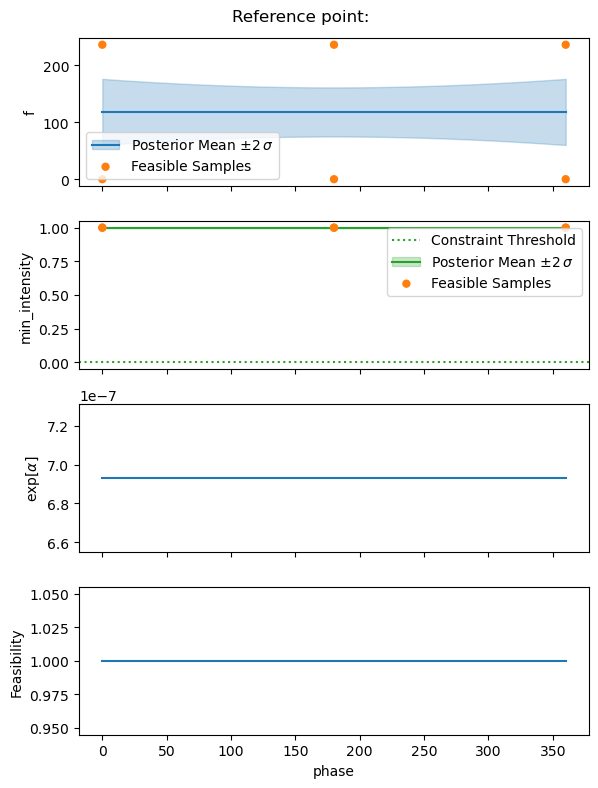

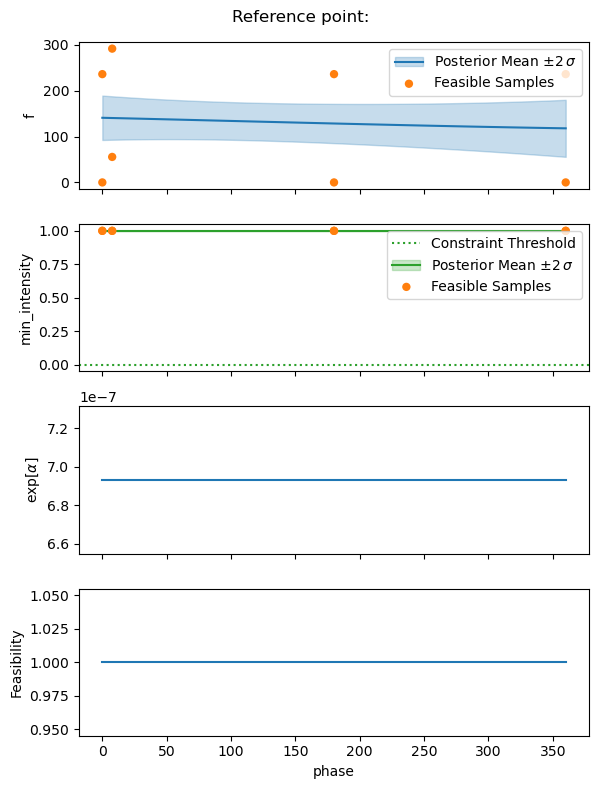

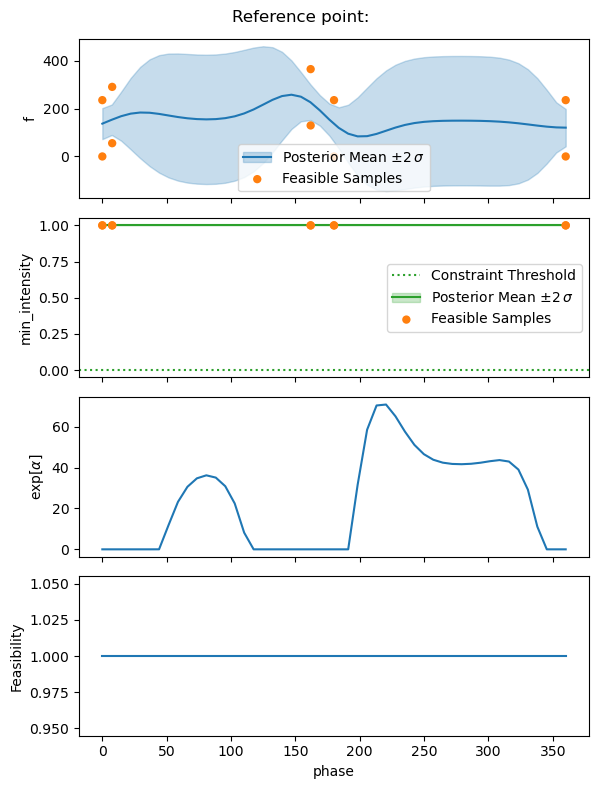

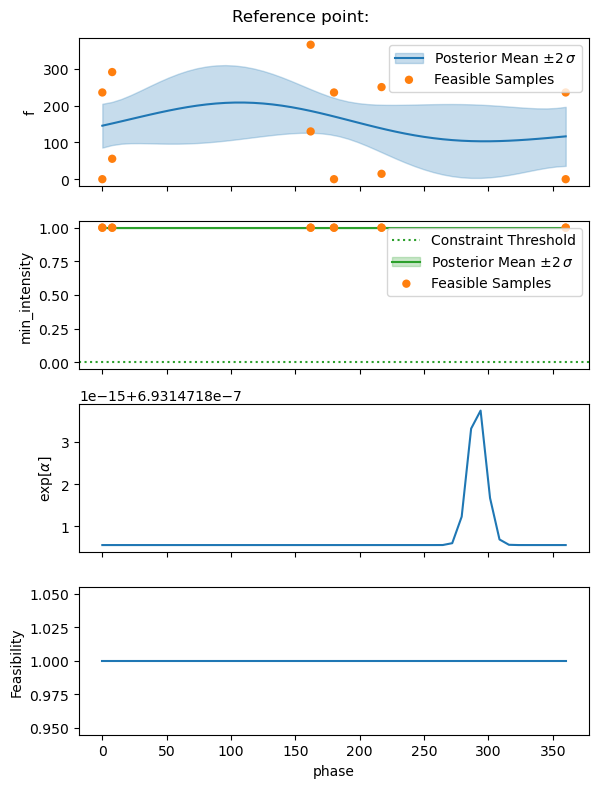

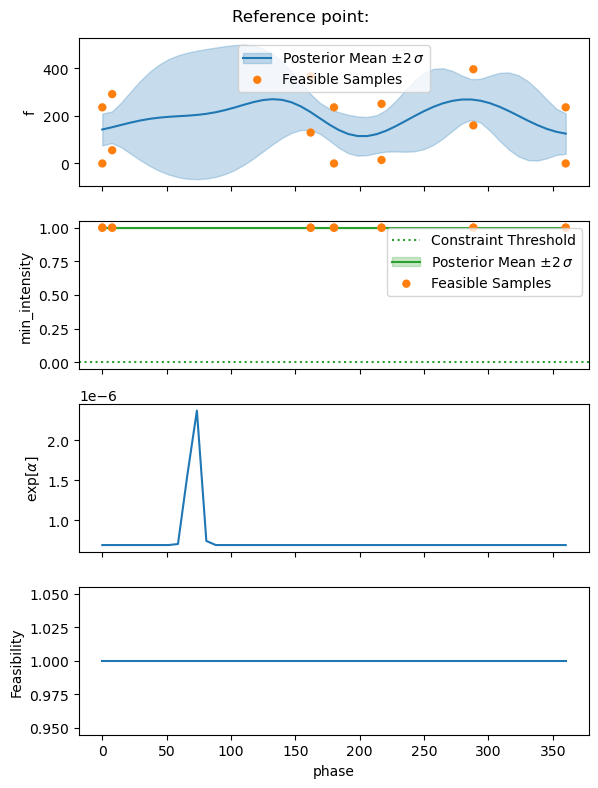

In [8]:
auto_phase.perform_beamsize_measurements()

In [9]:
auto_phase.X.data

,phase,f,min_intensity,xopt_runtime,xopt_error
0,0.000000,0.000182,1.0,2.760490,False
1,0.000000,235.987086,1.0,2.760490,False
2,180.000000,0.000131,1.0,2.798930,False
3,180.000000,235.987399,1.0,2.798930,False
4,360.000000,0.000108,1.0,2.762313,False
5,360.000000,235.98716,1.0,2.762313,False
6,7.653732,55.56017,1.0,2.756722,False
7,7.653732,291.547438,1.0,2.756722,False
8,161.849298,129.95588,1.0,2.759357,False
9,161.849298,365.943148,1.0,2.759357,False


In [10]:
print(auto_phase.centroids)
print(auto_phase.centroids)
auto_phase.determine_streaking()

[np.float64(971.4983989177957), np.float64(971.4987119407479), np.float64(971.4984728758113), np.float64(1027.058750641972), np.float64(1101.454460651613), np.float64(720.8669519000015), np.float64(575.355442690999), np.float64(1365.9008078033355)]
[np.float64(971.4983989177957), np.float64(971.4987119407479), np.float64(971.4984728758113), np.float64(1027.058750641972), np.float64(1101.454460651613), np.float64(720.8669519000015), np.float64(575.355442690999), np.float64(1365.9008078033355)]
Centroid is decreasing with phase (left streaking)


In [11]:
auto_phase.centroids

[np.float64(971.4983989177957),
 np.float64(971.4987119407479),
 np.float64(971.4984728758113),
 np.float64(1027.058750641972),
 np.float64(1101.454460651613),
 np.float64(720.8669519000015),
 np.float64(575.355442690999),
 np.float64(1365.9008078033355)]